In [6]:
from src.data_processing import load_cmu, load_data
import itertools  
from pprint import pprint
from nltk.corpus import cmudict
import nltk
import xmltodict
from matplotlib import pyplot as plt
from collections import Counter
from src.string_similarity import levenshtein
from src.pronunciations import phonetic_distance
import json

In [8]:
# Removing stresses
cmu = cmudict.dict()
for key, val in cmu.items():
    for i, phoneme in enumerate(val):
        cmu[key][i] = list(map(lambda ph: ph[:2], phoneme))

In [3]:
task1, task2, task3, min_pairs, strings, pun_strings = load_data()

In [4]:
sum(len(s) for s in strings)

108209

In [17]:
from statistics import *
def distances(method):
    levenshtein_distances = [method(w1, w2) for w1, w2 in min_pairs]
    print("Mean: ", mean(levenshtein_distances))
    print("Mode: ", mode(levenshtein_distances))
    print("STD: ", stdev(levenshtein_distances))
    print("Min: ", min(levenshtein_distances))
    print("Max: ", max(levenshtein_distances))
distances(levenshtein)
distances(phonetic_distance)

Mean:  2.4234972677595628
Mode:  2
STD:  1.4064812116795153
Min:  0
Max:  10
Mean:  0.7199152885728746
Mode:  1.0
STD:  0.22801368072679934
Min:  0.0
Max:  1.0


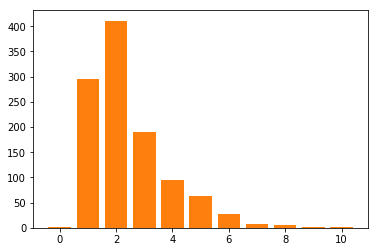

In [34]:
c = Counter(levenshtein_distances)
plt.bar(list(c.keys()), list(c.values()))
plt.show()

In [36]:
pairs_in_cmu = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu]
shared_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu and cmu[w1][0][0] == cmu[w2][0][0]]
first_letter_first_phoneme = [(w1, w2) for w1, w2 in min_pairs if w1 in cmu and w2 in cmu 
                              and cmu[w1][0][0] == cmu[w2][0][0]]
print("Number sharing same first phoneme: ", len(shared_first_phoneme) / len(pairs_in_cmu))
print("Number with same first letter: ", len([_ for w1, w2 in min_pairs if w1[0] == w2[0]]) / len(min_pairs))
print("First letter first phoneme: ", len(first_letter_first_phoneme) / len(pairs_in_cmu))

Number sharing same first phoneme:  0.85
Number with same first letter:  0.802367941712204
First letter first phoneme:  0.85


In [2]:
from src.data_processing import print_progress, load_cmu
import json
seen = set()
cmu = load_cmu()

with open("data/ngram_searchspace/ngram_totals.json") as f:
    db = json.load(f)

In [3]:
from src.pronunciations import phonetic_translation
import string
ascii_set = set(string.ascii_uppercase + string.ascii_lowercase)

In [ ]:
# new_cmu = {}
# # seen = set()
# for i, pun in enumerate(db):
#     print_progress(i, len(db))
    
#     for og, subs in pun.items():

#         og_word = og.split()[1].lower()
#         if og_word not in cmu and og_word not in seen:
#             try:
#                 new_cmu[og_word] = [phonetic_translation(og_word)]
#                 seen.add(og_word)
#             except:
#                 seen.add(og_word)
#                 pass
#         for sub in subs['substitutions']:
#             s_word = sub.split()[1].lower()
#             if not ascii_set.issuperset(s_word):
#                 continue
#             if s_word not in cmu and s_word not in seen:
#                 try:
#                     new_cmu[s_word] = [phonetic_translation(s_word)]
#                     seen.add(s_word)
#                 except IndexError:
#                     seen.add(s_word)
#                     pass
#                 except KeyboardInterrupt:
#                     print("Seen: {}".format(len(seen)))
#                 except:
#                     print(s_word)
#                     raise
#                     seen.add(s_word)
#                     pass

In [7]:
with open("corpus/new_cmu.json") as f:
    new_cmu = json.load(f)

In [5]:
# Size of original CMU dict
len(cmu)

123455

In [6]:
# Size of new CMU dict
len(new_cmu)

1064663

In [25]:
# Number of trigrams, size of Vocabulary
trigram_vocabulary = set()
total_size = 0
for example in db:
    for t, v in example.items():
        for subs in v['substitutions']:
            total_size += 1
            trigram_vocabulary.add(subs.split()[1])

In [24]:
total_size, len(trigram_vocabulary)

(66639115, 2415746)

In [36]:
# Number of trigram vocab words in cmu
tri_in_cmu = len([w for w in trigram_vocabulary if w.lower() in cmu])
tri_in_cmu, tri_in_cmu / len(trigram_vocabulary)

(242239, 0.10027502891446369)

In [52]:
len([w for w in trigram_vocabulary if w.lower() not in cmu])

2173507

In [59]:
tot_reduced = len([w for w in trigram_vocabulary if w.lower() not in cmu and ascii_set.issuperset(w)])
tot_reduced, tot_reduced / len(trigram_vocabulary)

(1331736, 0.5512731884891872)

In [56]:
len(combined_cmu) - len(cmu)

1064663

In [10]:
# Number of trigram vocab words in combined_cmu
combined_cmu = {}
for k, v, in cmu.items():
    combined_cmu[k] = v
for k, v in new_cmu.items():
    combined_cmu[k] = v
# tri_in_new_cmu = len([w for w in trigram_vocabulary if w.lower() in combined_cmu])
# tri_in_new_cmu, tri_in_new_cmu / len(trigram_vocabulary)

In [12]:
with open("corpus/combined_cmu.json", 'w') as f:
    json.dump(combined_cmu, f)

In [57]:
# Length of filtered trigram, accepting only words compromised of ascii values
filtered_trigram_vocabulary = [w for w in trigram_vocabulary if ascii_set.issuperset(w)]

In [58]:
len(filtered_trigram_vocabulary), len(filtered_trigram_vocabulary) / len(trigram_vocabulary)

(1573422, 0.6513193026088008)

In [39]:
filtered_tri_in_new_cmu = len([w for w in filtered_trigram_vocabulary if w.lower() in combined_cmu])
filtered_tri_in_new_cmu, filtered_tri_in_new_cmu / len(filtered_trigram_vocabulary)

(1573422, 1.0)

In [45]:
import random
import time
import cProfile

trigram_vocab_aslist = list(trigram_vocabulary)

example_size = 1000

random_words = [trigram_vocab_aslist[i] for i in random.sample(range(len(trigram_vocabulary)), example_size)]
before = time.time()

for w in random_words:
    try:
        phonetic_translation(w)
#         if w.lower() not in new_cmu:
#             continue
#         p = new_cmu[w.lower()]
    except IndexError:
        pass
time_taken = time.time() - before
print("Time taken: {}".format(time_taken))

Time taken: 0.0001308917999267578


In [65]:
before = time.time()
{w: combined_cmu[w] for w in trigram_vocabulary if w in combined_cmu}
time_taken = time.time() - before
print("Time taken: {}".format(time_taken))

Time taken: 0.7427577972412109


In [44]:
time_per_example = time_taken / example_size
time_per_example

0.08753555703163148

In [51]:
(time_per_example * len(filtered_trigram_vocabulary)) / 3600

38.25843644883991

In [50]:
(time_per_example * total_size) / 3600 / 24

67.5149543011568

In [35]:
len([w for w in trigram_vocabulary if w.lower() in new_cmu or w.lower() in cmu]) / len(trigram_vocabulary)

0.6515511150592819

In [32]:
phonetic_translation('UNORDERED')

['AH', 'N', 'ER', 'D', 'ER', 'D']

In [60]:
(time_per_example * 1331736) / 3600

32.38173682752132

In [61]:
strings

NameError: name 'strings' is not defined